# Problem 1

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


DATASET: EastWestAirlines.csv


In [10]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Clustering :- Grouping of similar observations together
    
    
    No target Variable. 
    
    We working only on input variables. (ie no dependent var.)
    
    unlabeled data

# 1 - Business Problem

Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters

# 2 - Data collection and description

In [12]:
df = pd.read_csv("EastWestAirlines.csv")
df1 = df.copy()

In [13]:
df1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
df1_norm = preprocessing.scale(df1)

In [15]:
df1_norm = pd.DataFrame(df1_norm) #standardize the data to normal distribution

In [16]:
df1_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


# 3 - Finding out the optimal number of clusters

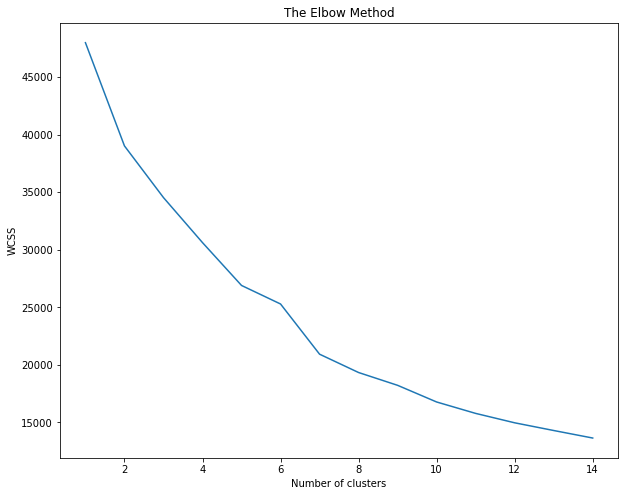

In [17]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As seen from the elbow graph, the slope changes at 2. However, since spltting the dataset into 2 groups would not be very beneficial, we further evaluate clusters for higher values of k.

# 4 - H Clustering

# 4.1 - Euclidean distance, Ward

For this we have to focus on structure called as dendrogram. It is a tree like structure. It helps to create clusters / homogeneous groups.

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [75.0, 75.0, 93.75, 93.75],
  [52.5, 52.5, 84.375, 84.375],
  [13.75, 13.75, 68.4375, 68.4375],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [41.09375, 41.09375, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [175.0, 175.0, 200.0, 200.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [285.0, 285.0, 295.0, 295.0],
  [251.25, 251.25, 290.0, 290.0],
  [225.0, 225.0, 270.625, 270.625],
  [187.5, 187.5, 247.8125, 247.8125],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [3

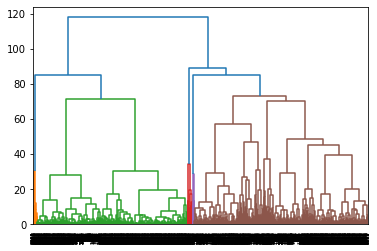

In [23]:
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='ward'))
dendrogram

From the Ward method, we see that as the height increases the clusters get grouped together

We decided to cut the tree at height 85 to obtain 3 clusters and then assigned each cluster with its respective observations

In [37]:
X = df1_norm.values

In [38]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [39]:
h_cluster = model.fit(X)

In [40]:
labels = model.labels_

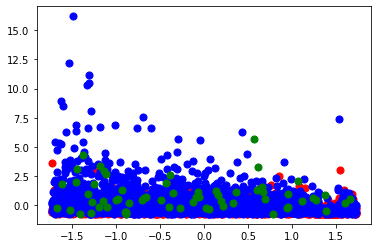

In [41]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

# 5 - K Means

In kMeans clustering, always we have to predefined no. of clusters. (Means how many clusters we count to divide our data.) Here we can uses the concept of centroid linkage. It is continuous iterative procedure

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df1_norm)

In [43]:
k_means

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [45]:
df1['k_cluster'] = k_cluster

In [46]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('k_cluster').mean(),1))

In [47]:
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2327.1,42243.6,91.1,1.2,1.0,1.0,4896.4,7.0,194.4,0.6,3549.8,0.2
2,1445.6,119557.7,165.6,3.6,1.0,1.0,38921.2,18.6,351.2,1.1,5147.4,0.6
3,1753.1,189304.2,788.7,2.2,1.0,1.0,31780.5,27.1,5420.4,15.8,4657.0,0.8


In [48]:
pd.DataFrame(round(df1.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525
2,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
3,164,164,164,164,164,164,164,164,164,164,164,164


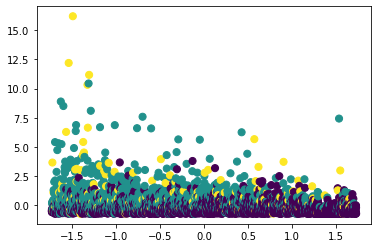

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=k_means, s=50, cmap='viridis')

# 5 - Conclusion

From the above data generated from K-Means clustering, we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.

# Problem 2

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


DATASET: crime_data.csv


In [50]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

# 1 - Business Problem

Perform Clustering for the crime data and identify the number of clusters formed and draw inferences

# 2 - Data collection and description

In [51]:
df1 = pd.read_csv("crime_data.csv")

In [52]:
df2 = df1.copy()

In [53]:
df2.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [54]:
df2.loc[:,'Total'] = df2.sum(numeric_only=True, axis=1)

In [55]:
df2.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [56]:
df2.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


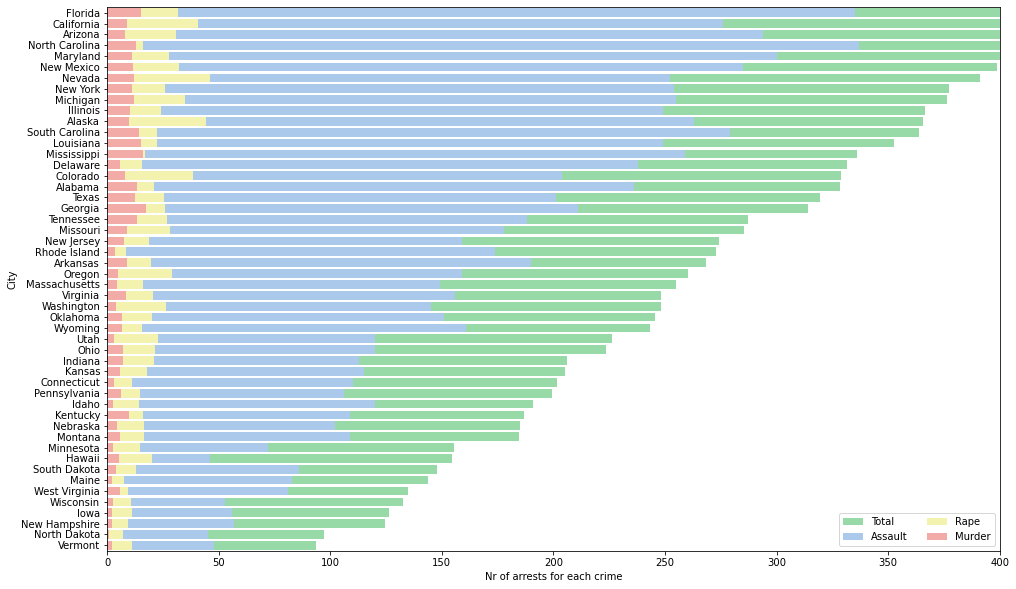

In [57]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df2.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

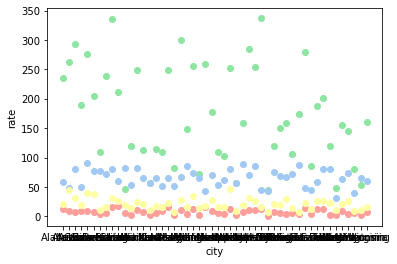

In [58]:
plt.scatter(df2.City, df2.Murder, color='r')
plt.scatter(df2.City, df2.Assault, color='g')
plt.scatter(df2.City, df2.Urbanpop, color='b')
plt.scatter(df2.City, df2.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

# 3 - Finding out the optimal number of clusters

In [59]:
X = df2[['Murder', 'Assault', 'Rape', 'Urbanpop']]

In [60]:
df2_norm = preprocessing.scale(X)

In [61]:
df2_norm = pd.DataFrame(df2_norm) #standardize the data to normal distribution

In [62]:
df2_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


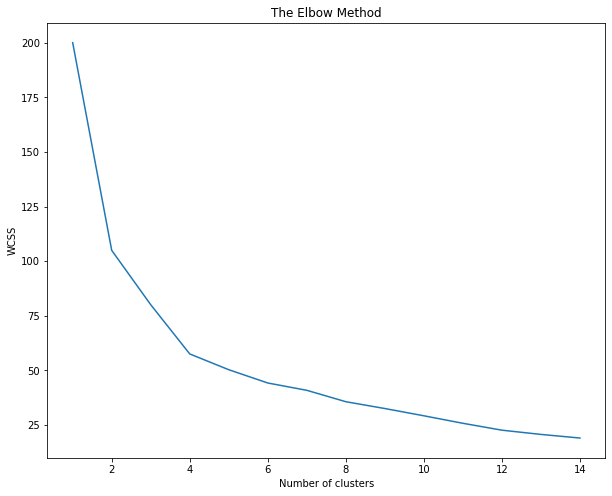

In [67]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
import warnings

The scree plot levels off at k=4 and let's use it to determine the clusters

# 4 - Analysing the data

In [68]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df2_norm)

In [69]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [70]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [71]:
df2['cluster'] = cluster

In [72]:
kmeans_mean_cluster = pd.DataFrame(round(df2.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,10.8,257.4,76.0,33.2,377.4
4,3.6,78.5,52.1,12.2,146.4


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

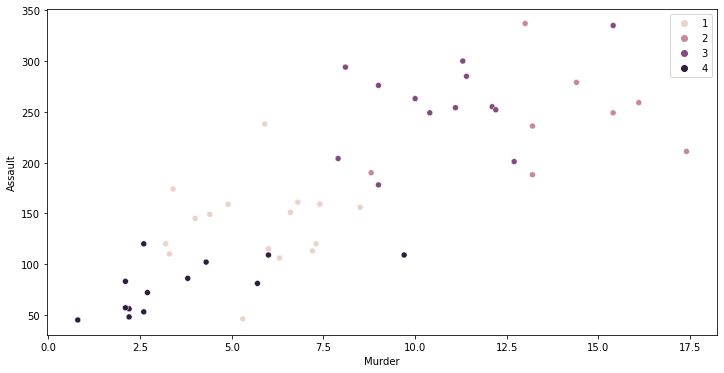

In [73]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df2['Murder'], y = df2['Assault'],hue=y_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

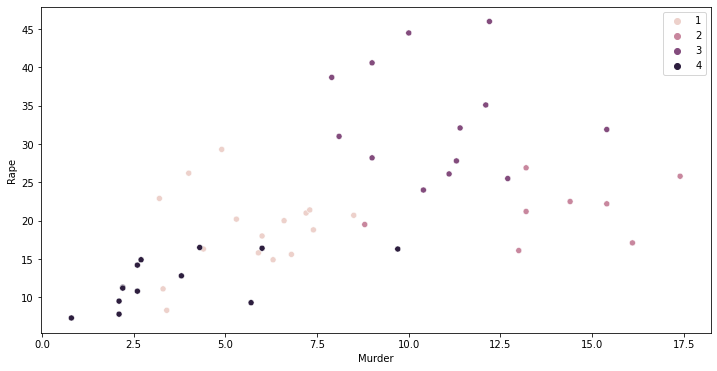

In [74]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df2['Murder'], y = df2['Rape'],hue=y_kmeans1)

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

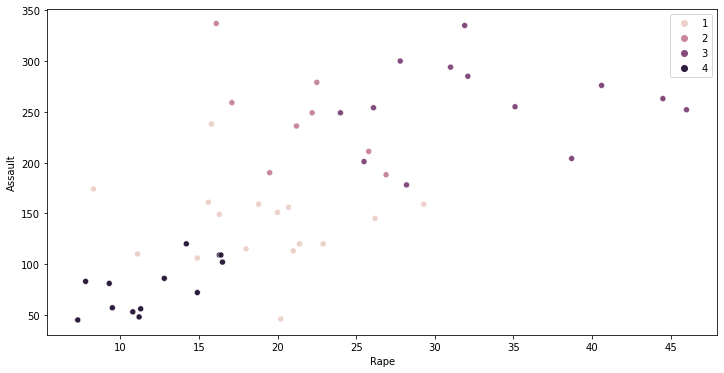

In [75]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df2['Rape'], y = df2['Assault'],hue=y_kmeans1)

In [76]:
stats = df2.sort_values("Total", ascending=True)
df2_total= pd.DataFrame(stats)

In [77]:
df2_total.head()

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,4
33,North Dakota,0.8,45,44,7.3,97.1,4
28,New Hampshire,2.1,57,56,9.5,124.6,4
14,Iowa,2.2,56,57,11.3,126.5,4
48,Wisconsin,2.6,53,66,10.8,132.4,4


# 5 - Conclusion

1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

2 = Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

3 - As with murder and assault, also rates of rape and assault show clearer correlations

 